# Week 06: Regression
## Introduction

This week, we will get some first-hand experience with regression.
We will implement a linear regression model and an appropriate error function, and observe the effect of model complexity and feature scaling.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Dataset

First, let's generate some data to work with. We will do this using a third-degree polynomial, $f(x) = -2x^3 + x^2 - 5x + 6$, and drawing a data sample from a normal (Gaussian) distribution.

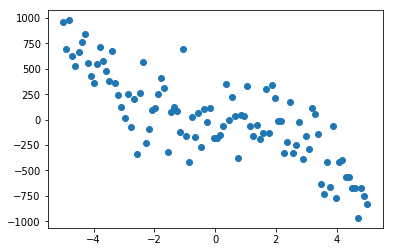

In [3]:
from numpy.random import normal, seed
seed(2490)

def make_labels(X, f, noise=0):
    return map(lambda x : f(x) + (normal(0,noise) if noise>0 else 0), X)
def make_instances(x1, x2, N):
    return np.linspace(x1,x2,N).reshape((-1, 1))
X = make_instances(-5, 5, 100)
y = np.array(list(make_labels(X, lambda x : -6*x**3 + x**2 -3*x + 5, 200)))
plt.scatter(X, y)

In [4]:
t = y.reshape(-1)
t.shape

(100,)

## Part A: Linear regression

We will now implement our own linear regression model. Our aim is to find an approximate function that fits the data generated above.

Since we are dealing with only one input variable, we start with a simple linear function, $f(x_1) = w_0 + w_1x_1$.

## Exercise 1: MSE

We wonder if our $f$ fits the data well, and what parameters will give us the best approximation. We will estimate this using the Mean Squared Error:

$\frac{1}{N} \sum_{j=1}^{N} (t_j - \sum_{i=0}^{m} w_ix_{ji})^2$

Write a function calculating MSE of our approximation.

In [5]:
def mse(weights, target, X):
    return (target-weights@X).mean()

## Exercise 2: Linear regression with gradient descent

We will implement linear regression with gradient descent and test it on the data. To make it simple, we will add a $x_0=1$ to all our datapoints, and consider $f(x_1) = w_0 + w_1x_1$ as $f(x_0, x_1) = w_0x_0+ w_1x_1$. Make a procedure that does this.

We will implement the linear regression in a class as we did with the classifiers last week. The fit method will run the gradient descent step a number of times to train the classifier. The predict method should take a matrix containing several data points and predict the outcome for all of them. Fill in the methods.
After training there should be an attribute with learned coeffeients (weights) which is applied by the predict method.

In [6]:
import numpy.random as rnd

class NumpyLinReg():

    def __init__(self, X_train, t_train):
        # Append ones to the start of the train data for intercept
        self.X_train = np.concatenate([np.ones(X_train.shape), X_train], axis=1)
        self.t_train = t_train


    def fit(self, gamma=0.01, epochs=10):
        # Generate random starting positions
        starts = rnd.rand(epochs, 2) * 20 - 10
        for start in starts:
            weights = self.gradient_descent(start, gamma)
            self.weights = weights


    def gradient_descent(self, start, gamma, precision=0.00001):
        df = gamma * 2 * np.mean(
            (self.X_train@start - self.t_train) * self.X_train.T,
            axis=1)
        while np.any(df > precision):
            start -= df
            df = gamma * 2 * np.mean(
                (self.X_train@start - self.t_train) * self.X_train.T,
                axis=1)
            print(start)
        return start

    
    def predict(self, x):
        pass

Fit the NumpyLinReg to the data.

[ -2.40940162 -18.67531909]
[ -2.02778908 -35.15925147]
[ -1.65380879 -48.84036033]
[ -1.2873081  -60.19522004]
[ -0.92813743 -69.61937128]
[ -0.57615017 -77.4410995 ]
[ -0.23120266 -83.93287056]
[  0.1068459  -89.32082197]
[  0.43813349 -93.79264022]
[  0.76279533 -97.50409881]
[   1.08096394 -100.58448446]
[   1.39276917 -103.14110085]
[   1.69833829 -105.26300636]
[   1.99779604 -107.02411649]
[   2.29126462 -108.48577861]
[   2.57886384 -109.69890895]
[   2.86071107 -110.70576628]
[   3.13692136 -111.54142397]
[   3.40760744 -112.23499172]
[   3.6728798  -112.81062959]
[   3.93284672 -113.28838965]
[   4.18761429 -113.6849144 ]
[   4.43728651 -114.0140166 ]
[   4.68196529 -114.28716035]
[   4.9217505  -114.51386046]
[   5.15674    -114.70201392]
[   5.3870297  -114.85817495]
[   5.61271362 -114.98778336]
[   5.83388386 -115.09535397]
[   6.05063069 -115.18463395]
[   6.26304258 -115.25873333]
[   6.47120624 -115.32023332]
[   6.67520663 -115.37127624]
[   6.875127   -115.41364015]


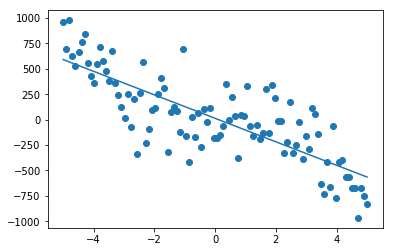

In [7]:
lin_reg = NumpyLinReg(X, t)
lin_reg.fit(epochs=1)

plt.scatter(X, t)
x_plot = np.linspace(-5, 5, 100)
f = lambda x: lin_reg.weights[0] + x * lin_reg.weights[1]
plt.plot(x_plot, f(x_plot))

How many iterations do you have to run before the training stabilize?

In [8]:
# Your code here.

Now that we have our coefficients, plot the line that approximates our data.

In [9]:
y_pred = # Your code here

plt.plot(X, y_pred, color="r")

# The generated dataset
plt.scatter(X, y)

SyntaxError: invalid syntax (<ipython-input-9-dd61376f193d>, line 1)

Using the MSE function you wrote in Exercise 1, calculate the accuracy of this model.

In [ ]:
# Your code here

## Exercise 3 (Bonus)

Last week we implemented the perceptron classifier using pure python. Reimplement it with similar Numpy representations as above.

## Part B: Scaling the data

In the lectures, we mentioned the importance of scaling/normalising/standardising the data. Let's see the effects of this on a practical example.

## Dataset

First, we'll load a dataset with features that intentionally vary in scale. "ex1data2.txt" [source](https://github.com/nex3z/machine-learning-exercise) is a dataset of housing prices, including the size of the house (in square feet), the number of bedrooms, and the price of the house.

In [ ]:
data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

## Exercise 4.1: Without scaling

First, let's run our LinReg model on the original data. Print the slope of the gradient at various epochs, and for different learning rates. What do you see?

In [ ]:
# Your code here

## Exercise 4.2: With scaling

Now let's normalise the features. Implement your min-max normalisation, and use it to scale the data. Then try rerunning the experiment as in the previous exercise. What do you see now?

In [ ]:
# Your code here